<a href="https://colab.research.google.com/github/gianiarda/latihan2/blob/main/GMM_Latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian Mixture Model**

Gaussian Mixture Models (GMM) efektif untuk representasi densitas multimodel. Pada eksperimen ini Parameter GMM diestimasi dengan menggunakan algoritma Expectation Maximization (EM) yang hasilnya ditampilkan untuk dataset yang diberikan pada link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Pertanyaan:

A. Cobalah lakukan pengelompokan pada data 2d:
a. PetalLenght vs Petal witdh
b. SepalLenght vs Sepal width

 dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

Anda boleh memodifikasi jumlah cluster yang berubah-ubah dengan pendekatan berikut:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM 
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.



Model campuran Gaussian dengan struktur kovarians yang berbeda:
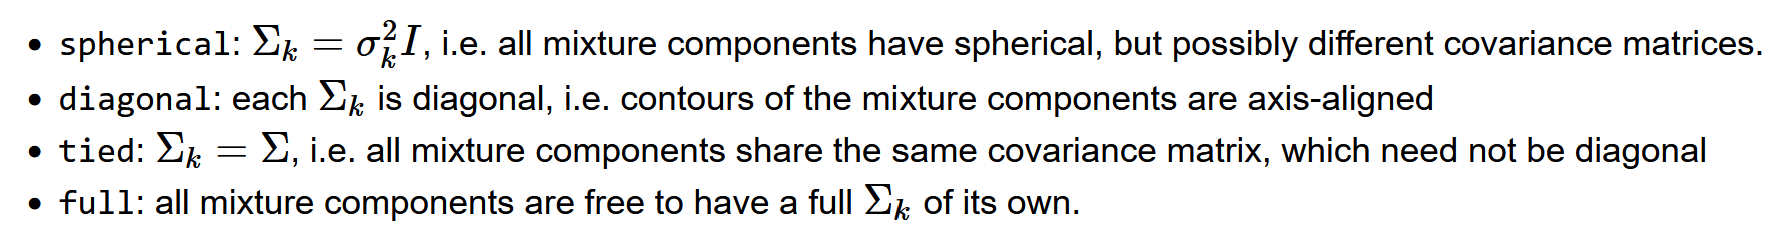

In [40]:
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [41]:
print(data)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [42]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [43]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
92    93            5.8           2.6            4.0
45    46            4.8           3.0            1.4
53    54            5.5           2.3            4.0
108  109            6.7           2.5            5.8
70    71            5.9           3.2            4.8
141     Iris-virginica
36         Iris-setosa
59     Iris-versicolor
44         Iris-setosa
82     Iris-versicolor
Name: Species, dtype: object


In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# see how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

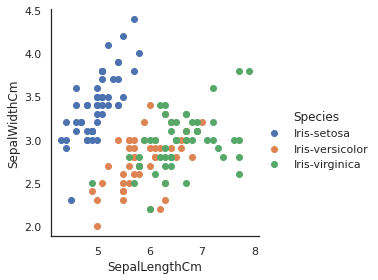

In [45]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

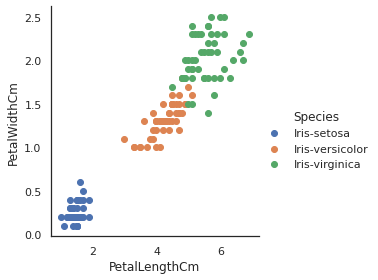

In [46]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [66]:
# try clustering on the 4d data and see if can reproduce the actual clusters.

# ie imagine we don't have the species labels on this data and wanted to
# divide the flowers into species. could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Silhouette score** - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [67]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4262689752753905

In [51]:
from sklearn.mixture import GaussianMixture

In [64]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

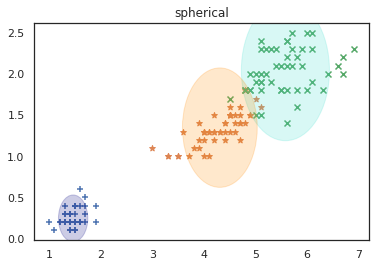

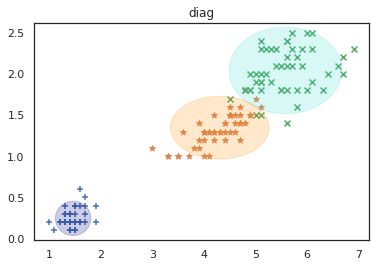

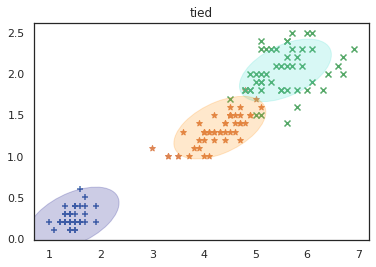

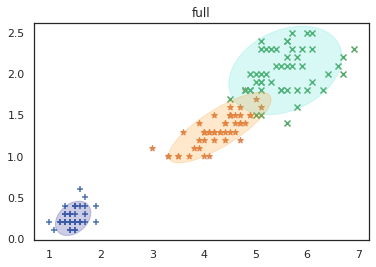

In [65]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()
